In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xclim 
import xarray as xr
from pathlib import Path
# import dask 
import os 

In [3]:
from Barcelona import indicators_Barcelona as iB 

In [5]:
import numpy as np 
import xarray as xr

import geopandas as gpd


import rioxarray
import xarray
from shapely.geometry import mapping


In [6]:
import xarray as xr
# dataset = xr.open_zarr('/mnt/stg/climate/CIL/iberia/CIL_historical.zip')
dataset = xr.open_zarr('/mnt/stg/climate/CIL/iberia/CIL_historical')
dataset


<xarray.Dataset> Size: 2GB
Dimensions:  (lat: 36, lon: 52, model: 11, time: 9125)
Coordinates:
  * lat      (lat) float64 288B 35.12 35.38 35.62 35.88 ... 43.38 43.62 43.88
  * lon      (lon) float64 416B -9.375 -9.125 -8.875 ... 2.875 3.125 3.375
  * model    (model) <U20 880B 'ACCESS-CM2' 'BCC-CSM2-MR' ... 'UKESM1-0-LL'
  * time     (time) object 73kB 1990-01-01 12:00:00 ... 2014-12-31 12:00:00
Data variables:
    pr       (model, time, lat, lon) float32 752MB dask.array<chunksize=(1, 100, 36, 52), meta=np.ndarray>
    tasmax   (model, time, lat, lon) float32 752MB dask.array<chunksize=(1, 100, 36, 52), meta=np.ndarray>
    tasmin   (model, time, lat, lon) float32 752MB dask.array<chunksize=(1, 100, 36, 52), meta=np.ndarray>

In [24]:
outpath = '/mnt/stg/climate/CIL/iberia/indicators/txx/'

# Catalonia
lat_min, lat_max = 40.3, 42.6
lon_min, lon_max = -1.3, 3.4



In [20]:
# select years 1990-2005 
data = dataset.sel(time=slice("1990","2005")).sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
# convert to C 
data = data - 273.15 

In [21]:
# txx = iB.txx(combined['tasmax'])
txx_jja = iB.txx(data['tasmax'], freq='seas', season='JJA')
txx_son = iB.txx(data['tasmax'], freq='seas', season='SON')
txx_djf = iB.txx(data['tasmax'], freq='seas', season='DJF')
txx_mam = iB.txx(data['tasmax'], freq='seas', season='MAM')

In [13]:
txx_jja

<xarray.DataArray 'tasmax' (model: 11, time: 16, lat: 36, lon: 52)> Size: 1MB
dask.array<getitem, shape=(11, 16, 36, 52), dtype=float32, chunksize=(1, 1, 36, 52), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 288B 35.12 35.38 35.62 35.88 ... 43.38 43.62 43.88
  * lon      (lon) float64 416B -9.375 -9.125 -8.875 ... 2.875 3.125 3.375
  * model    (model) <U20 880B 'ACCESS-CM2' 'BCC-CSM2-MR' ... 'UKESM1-0-LL'
  * time     (time) object 128B 1990-06-01 00:00:00 ... 2005-06-01 00:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: maximum
    comment:        maximum near-surface (usually, 2 meter) air temperature (...
    history:        2019-11-09T02:07:38Z altered by CMOR: Treated scalar dime...
    long_name:      Daily Maximum Near-Surface Air Temperature
    standard_name:  air_temperature
    units:          degC

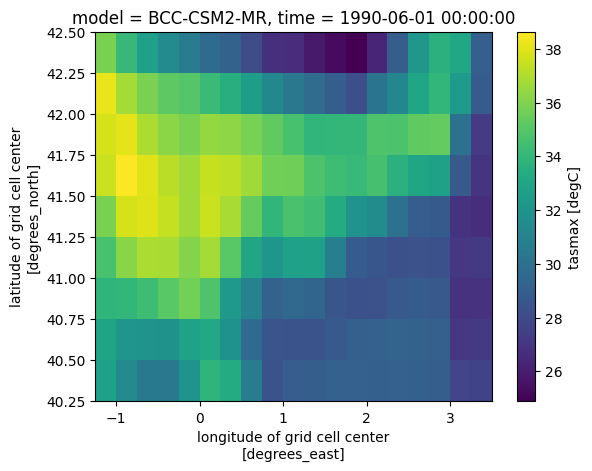

In [22]:
txx_jja.isel(time=0).isel(model=1).plot()

In [9]:
txx_jja

<xarray.DataArray 'tasmax' (time: 16, lat: 276, lon: 564)> Size: 10MB
array([[[31.749994, 31.749994, 31.749994, ...,       nan,       nan,
               nan],
        [31.649988, 31.550013, 31.550013, ...,       nan,       nan,
               nan],
        [31.35    , 31.35    , 31.649988, ...,       nan,       nan,
               nan],
        ...,
        [36.05001 , 36.249992, 36.149986, ...,       nan,       nan,
               nan],
        [36.149986, 36.249992, 36.149986, ...,       nan,       nan,
               nan],
        [35.649986, 35.649986, 36.05001 , ...,       nan,       nan,
               nan]],

       [[32.649986, 32.649986, 32.649986, ...,       nan,       nan,
               nan],
        [32.450005, 32.450005, 32.35    , ...,       nan,       nan,
               nan],
        [32.149986, 32.249992, 32.450005, ...,       nan,       nan,
               nan],
...
        [35.249992, 35.55001 , 35.450005, ...,       nan,       nan,
               nan],
        [35.35    , 35.55001 , 35.55001 , ...,       nan,       nan,
               nan],
        [34.85    , 35.05001 , 35.450005, ...,       nan,       nan,
               nan]],

       [[35.149986, 35.249992, 35.249992, ...,       nan,       nan,
               nan],
        [34.950005, 34.950005, 34.950005, ...,       nan,       nan,
               nan],
        [34.649986, 34.649986, 35.05001 , ...,       nan,       nan,
               nan],
        ...,
        [36.149986, 36.249992, 36.249992, ...,       nan,       nan,
               nan],
        [36.149986, 36.149986, 36.149986, ...,       nan,       nan,
               nan],
        [35.85    , 35.85    , 36.05001 , ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 5kB -1.296 -1.288 -1.279 -1.271 ... 3.379 3.387 3.396
  * lat      (lat) float64 2kB 40.3 40.31 40.32 40.33 ... 42.57 42.58 42.59 42.6
  * time     (time) datetime64[ns] 128B 1990-06-01 1991-06-01 ... 2005-06-01
Attributes:
    grid_mapping:   crs
    long_name:      Daily Maximum Near-Surface Air Temperature
    standard_name:  air_temperature
    units:          degC

In [25]:
print(f"{outpath}Txx_Catalonia_1990_2005_jja.nc")

/mnt/stg/climate/CIL/iberia/indicators/txx/Txx_Catalonia_1990_2005_jja.nc


In [26]:
txx_jja.to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_jja.nc")
txx_son.to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_son.nc")
txx_mam.to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_mam.nc")
txx_djf.to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_djf.nc")                  
                                    

In [27]:
txx_jja.mean(dim='time').to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_jja_mean.nc")
txx_son.mean(dim='time').to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_son_mean.nc")
txx_mam.mean(dim='time').to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_mam_mean.nc")
txx_djf.mean(dim='time').to_netcdf(f"{outpath}Txx_Catalonia_1990_2005_djf_mean.nc")                  
                                    